In [184]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy import stats
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential
from sklearn.ensemble import RandomForestClassifier


In [185]:

file_path = '/content/heart_disease_uci.csv'
data = pd.read_csv(file_path)


In [186]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# **Data cleaning and preprocessing**

In [188]:

missing_values = data.isnull().sum()


print(missing_values)

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


BEFORE MISSING VALUES

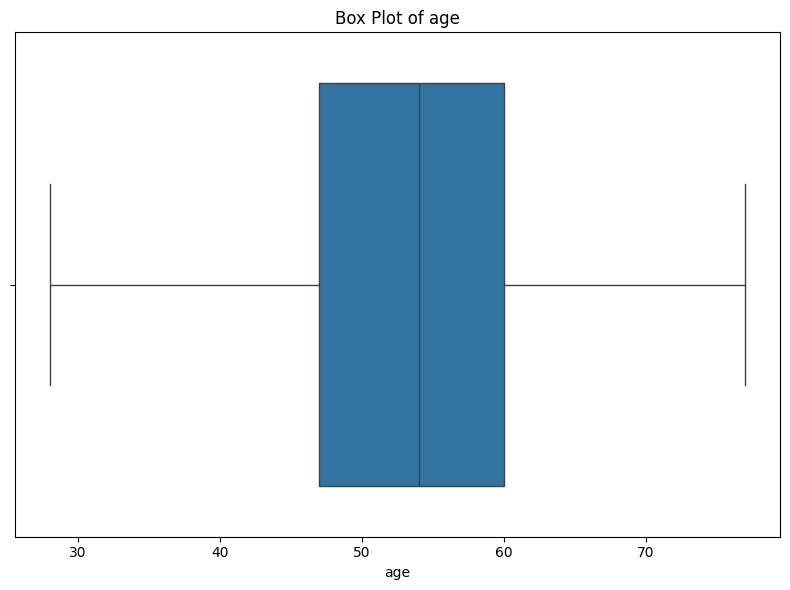

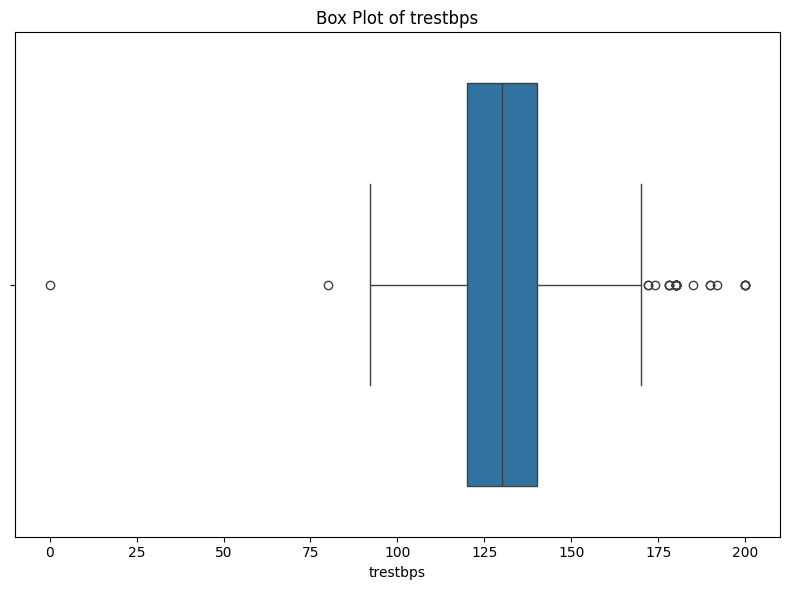

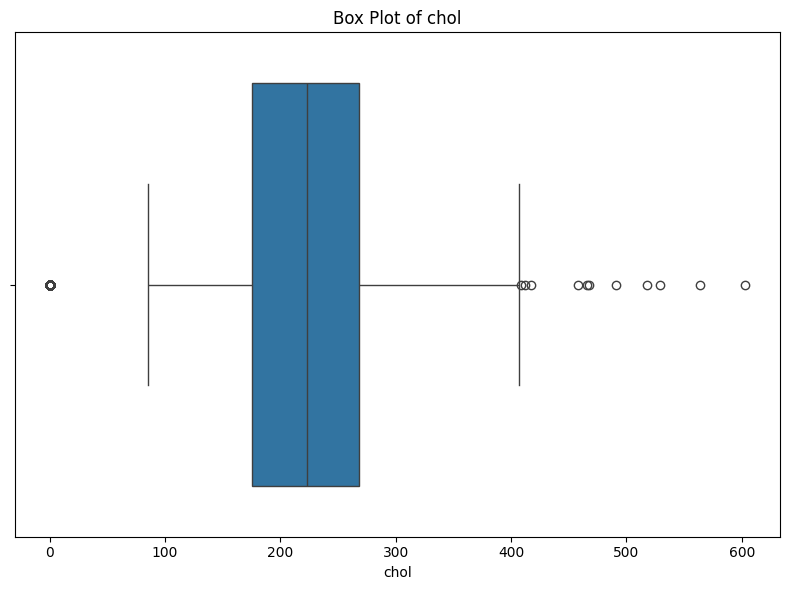

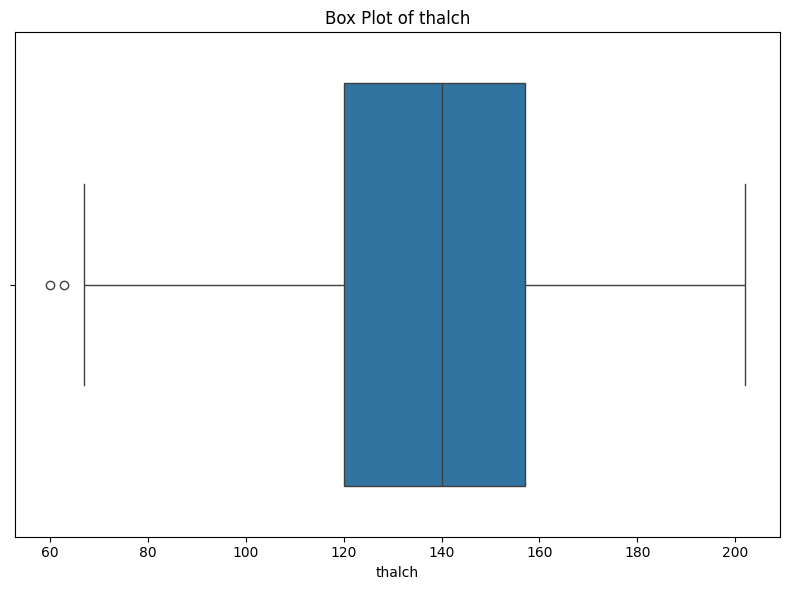

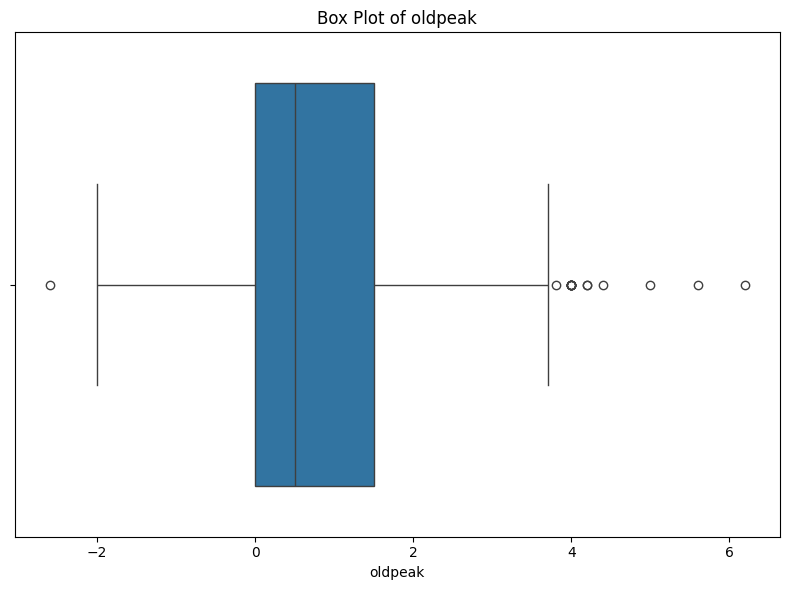

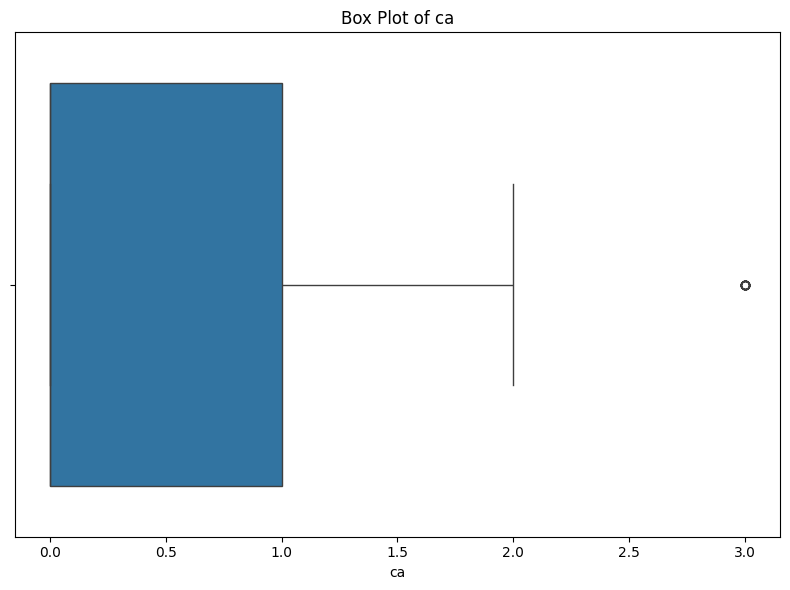

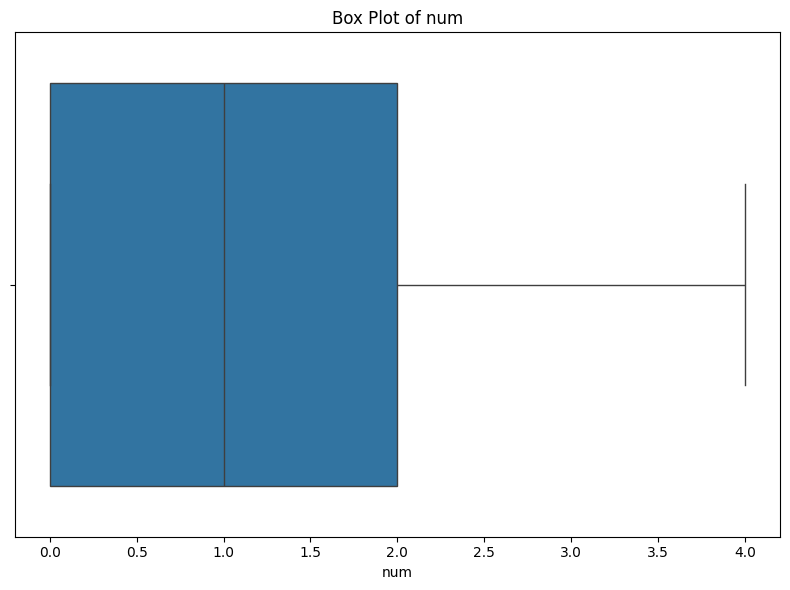

In [189]:
numerical_features = data.select_dtypes(include=['number'])

for column in numerical_features.columns:
    if column != 'id': # Exclude 'id' column from box plot
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data[column])
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.tight_layout()
        plt.show()

In [190]:
def remove_outliers_iqr(data, column):
    """Removes outliers from a pandas DataFrame column using the IQR method.

    Args:
        data: pandas DataFrame.
        column: Name of the column to remove outliers from.

    Returns:
        pandas DataFrame with outliers removed.
    """

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_filtered


numerical_features = data.select_dtypes(include=['number'])

for column in numerical_features.columns:
  if column != 'id': # Exclude 'id' column from outlier removal
    data = remove_outliers_iqr(data, column)

After missing values

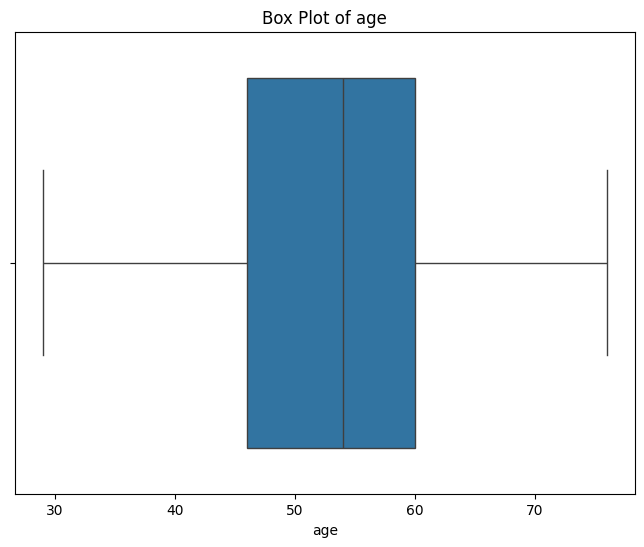

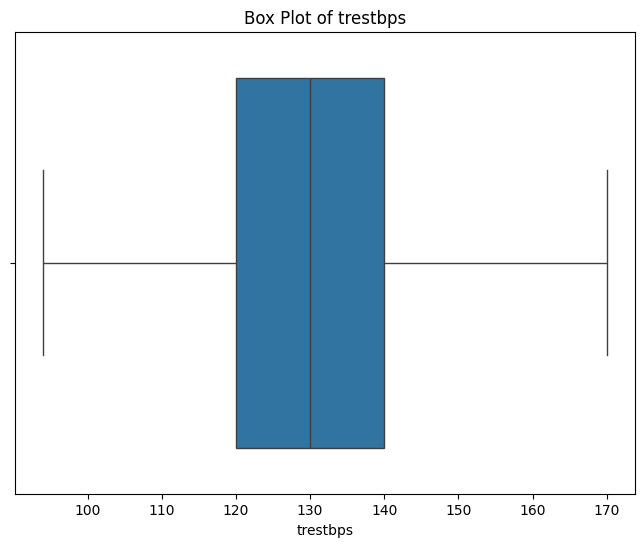

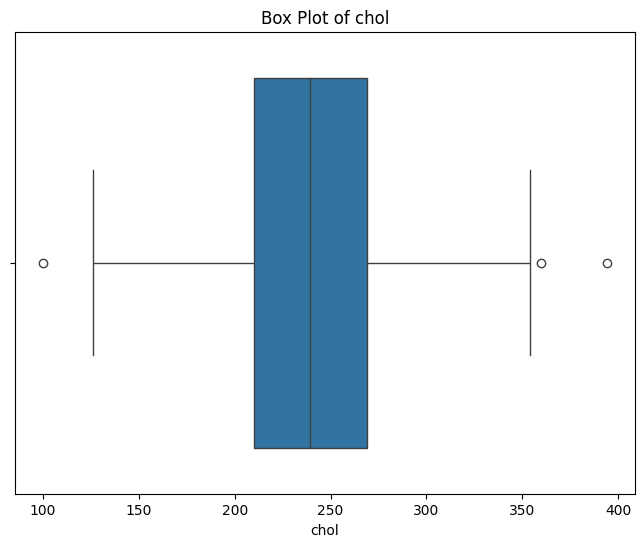

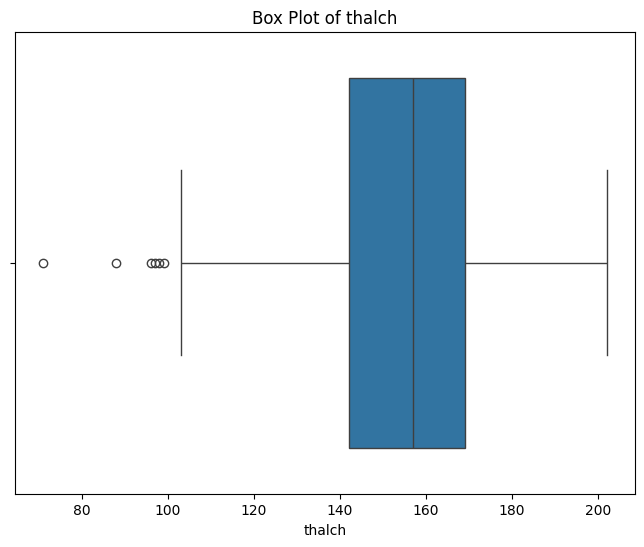

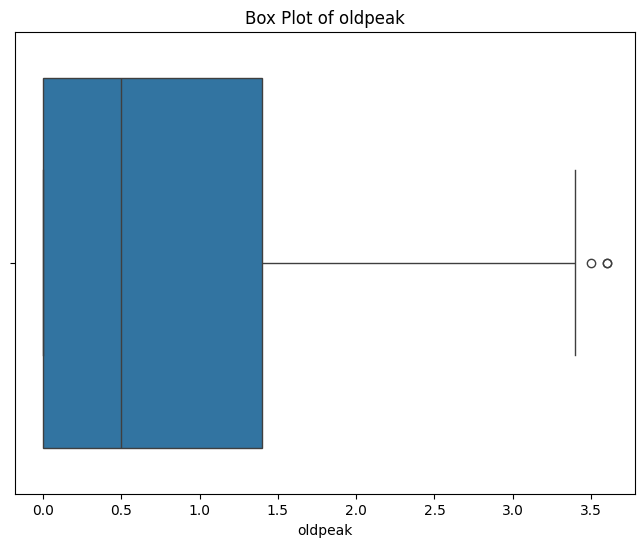

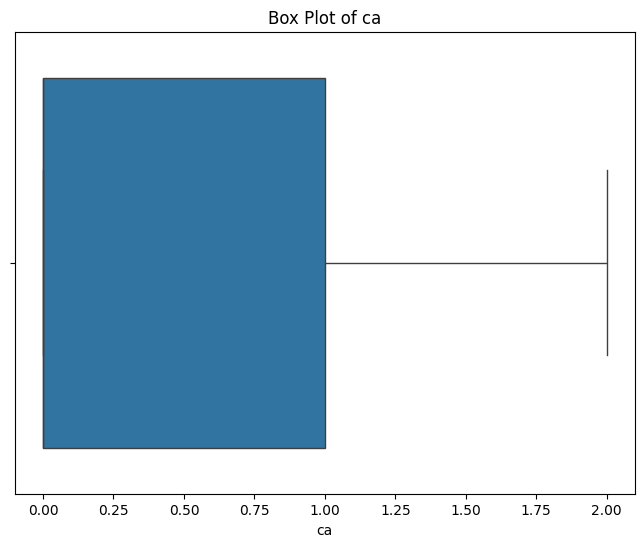

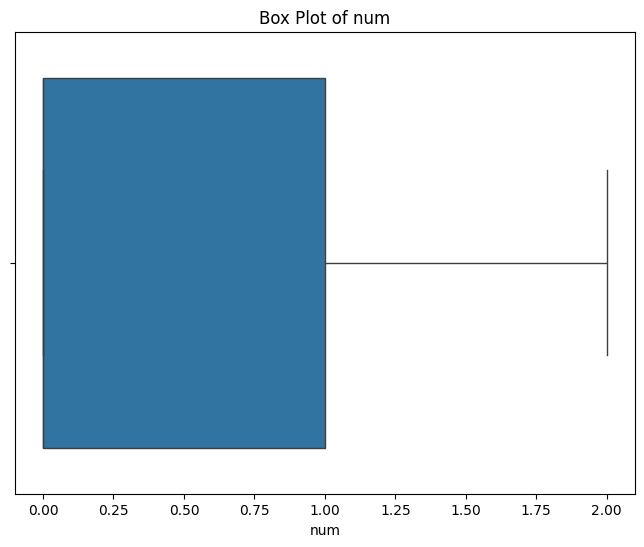

In [191]:
numerical_features = data.select_dtypes(include=['number'])


for column in numerical_features.columns:
  if column != 'id': # Exclude 'id' column from box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [192]:

missing_values = data.isnull().sum()


print(missing_values)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       1
ca          0
thal        3
num         0
dtype: int64


In [193]:
#finding mode value for slope
mode_val=data['slope'].value_counts()

#replacing null with mode value
data = data.fillna({"slope": mode_val[0]})

#finding mode value for slope
mode_val=data['thal'].value_counts()

#replacing null with mode value
data = data.fillna({"thal": mode_val[0]})

/tmp/ipython-input-1652209332.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = data.fillna({"slope": mode_val[0]})
/tmp/ipython-input-1652209332.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = data.fillna({"thal": mode_val[0]})


In [194]:
missing_values = data.isnull().sum()


print(missing_values)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [195]:
# Dictionary to store mapping info
mapping_info = {}

# Loop through categorical columns
for col in data.select_dtypes(include=['object', 'category']).columns:
    unique_vals = data[col].unique()
    mapping_dict = {value: idx for idx, value in enumerate(unique_vals)}
    data[col] = data[col].map(mapping_dict)
    mapping_info[col] = {
        'mapping': mapping_dict,
        'unique_values': list(unique_vals)
    }

# Optional: Fill NaN values with a placeholder (e.g., -1)
data = data.fillna(-1)

# Print mapping info
for col, info in mapping_info.items():
    print(f"\nColumn: {col}")
    print("Mapping:", info['mapping'])
    print("Original Values:", info['unique_values'])




Column: sex
Mapping: {'Male': 0, 'Female': 1}
Original Values: ['Male', 'Female']

Column: dataset
Mapping: {'Cleveland': 0, 'Hungary': 1, 'VA Long Beach': 2}
Original Values: ['Cleveland', 'Hungary', 'VA Long Beach']

Column: cp
Mapping: {'typical angina': 0, 'asymptomatic': 1, 'non-anginal': 2, 'atypical angina': 3}
Original Values: ['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina']

Column: fbs
Mapping: {True: 0, False: 1}
Original Values: [True, False]

Column: restecg
Mapping: {'lv hypertrophy': 0, 'normal': 1, 'st-t abnormality': 2}
Original Values: ['lv hypertrophy', 'normal', 'st-t abnormality']

Column: exang
Mapping: {False: 0, True: 1}
Original Values: [False, True]

Column: slope
Mapping: {'downsloping': 0, 'flat': 1, 'upsloping': 2, 125: 3}
Original Values: ['downsloping', 'flat', 'upsloping', 125]

Column: thal
Mapping: {'fixed defect': 0, 'reversable defect': 1, 'normal': 2, 147: 3}
Original Values: ['fixed defect', 'reversable defect', 'normal', 147]


In [196]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,0,0,0,145.0,233.0,0,0,150.0,0,2.3,0,0.0,0,0
2,3,67,0,0,1,120.0,229.0,1,0,129.0,1,2.6,1,2.0,1,1
3,4,37,0,0,2,130.0,250.0,1,1,187.0,0,3.5,0,0.0,2,0
4,5,41,1,0,3,130.0,204.0,1,0,172.0,0,1.4,2,0.0,2,0
5,6,56,0,0,3,120.0,236.0,1,1,178.0,0,0.8,2,0.0,2,0


In [197]:
data.drop(columns=['id'], inplace=True)

In [198]:
data.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,0,0,0,145.0,233.0,0,0,150.0,0,2.3,0,0.0,0,0
2,67,0,0,1,120.0,229.0,1,0,129.0,1,2.6,1,2.0,1,1
3,37,0,0,2,130.0,250.0,1,1,187.0,0,3.5,0,0.0,2,0
4,41,1,0,3,130.0,204.0,1,0,172.0,0,1.4,2,0.0,2,0
5,56,0,0,3,120.0,236.0,1,1,178.0,0,0.8,2,0.0,2,0


MODEL TRAIN

DECISION TREE

Accuracy: 0.5531914893617021
Precision: 0.5560770407453761
Recall: 0.5531914893617021
F1-score: 0.519076812116841
Confusion Matrix:
[[21  3  1]
 [ 9  2  0]
 [ 4  4  3]]


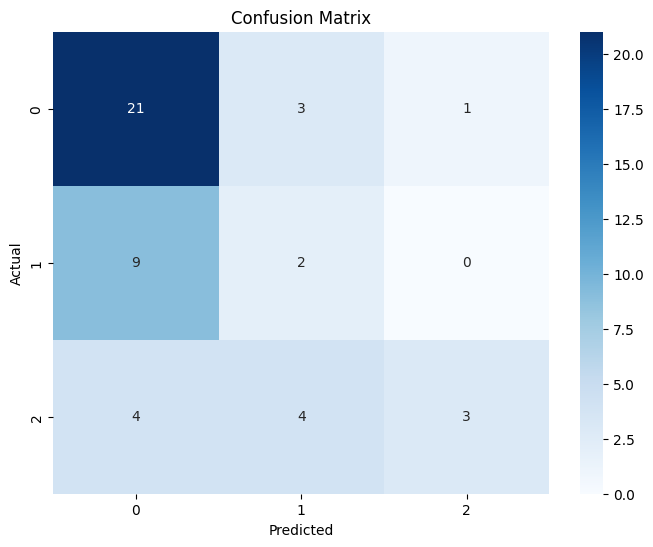

In [199]:
X = data.drop(columns=['num'])
y = data['num']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

class_names = sorted(y.unique())

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## as we can see the predicted results are not quite up to the mark, we will try to tune it now.

In [200]:


best_score = 0
best_params = {}

for depth in [3, 5, 7, 10, None]:
    for split in [2, 5, 10, 20]:
        for leaf in [1, 2, 5, 10]:
            model = DecisionTreeClassifier(
                max_depth=depth,
                min_samples_split=split,
                min_samples_leaf=leaf,
                criterion="gini",
                random_state=42
            )
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            acc = accuracy_score(y_test, y_pred)
            if acc > best_score:
                best_score = acc
                best_params = {
                    "max_depth": depth,
                    "min_samples_split": split,
                    "min_samples_leaf": leaf,
                    "criterion": "gini"
                }

print("Best Accuracy:", best_score)
print("Best Parameters:", best_params)


Best Accuracy: 0.6170212765957447
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'criterion': 'gini'}


# **Parameter Tuning**

Final Model Performance
Accuracy: 0.6170
Precision: 0.6480
Recall: 0.6170
F1-score: 0.5606


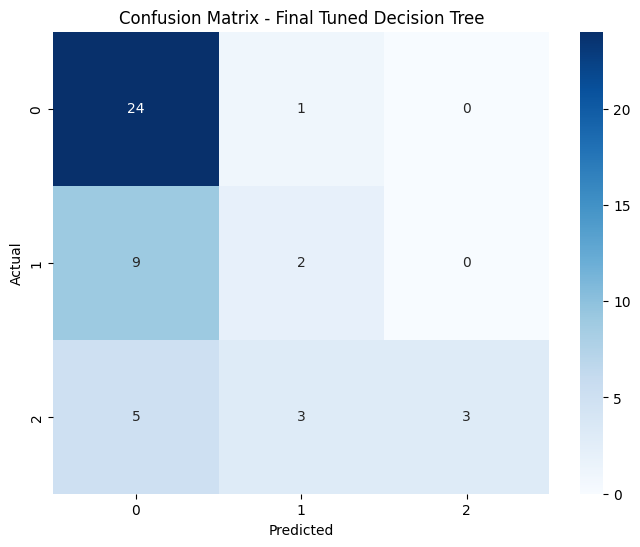

In [201]:

final_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=2,
    criterion="gini",
    random_state=42
)

final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Final Model Performance")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Final Tuned Decision Tree")
plt.show()


After the parameter tuning, SVM performed better than the first time.

## **SVM**

Accuracy: 0.5531914893617021
Precision: 0.5560770407453761
Recall: 0.5531914893617021
F1-score: 0.519076812116841
Confusion Matrix:
[[21  3  1]
 [ 9  2  0]
 [ 4  4  3]]


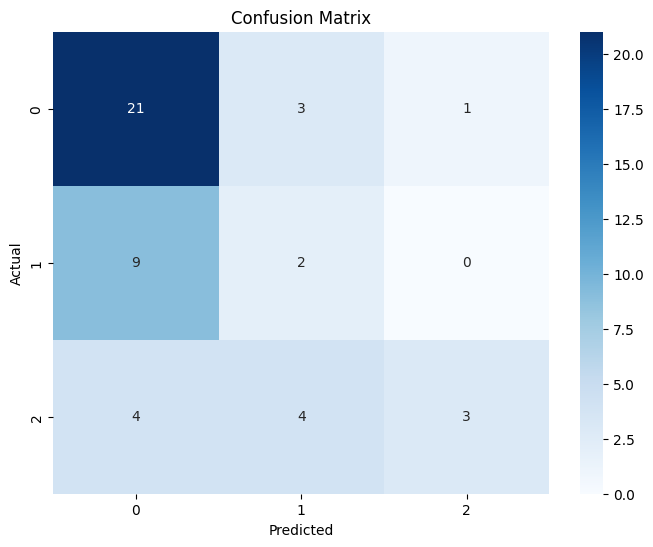

In [202]:
y = data['num']
X = data.drop('num', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


class_names = sorted(y_test.unique())


print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## **SVM MODEL WITH KERNEL = "LINEAR"**

In [203]:

X = data.drop('num', axis=1)
y = data['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.48936170212765956
Precision: 0.49232373800584067
Recall: 0.48936170212765956
F1-score: 0.4497793347414695
Confusion Matrix:
[[20  4  1]
 [10  1  0]
 [ 4  5  2]]


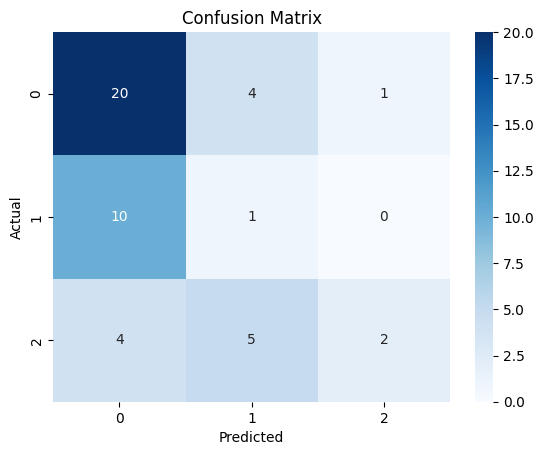

In [204]:

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)




sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **SVM MODEL WITH KERNEL = RBF**

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy (RBF): 0.5319148936170213
Precision (RBF): 0.282933454051607
Recall (RBF): 0.5319148936170213
F1-score (RBF): 0.3693853427895981
Confusion Matrix (RBF):
[[25  0  0]
 [11  0  0]
 [11  0  0]]


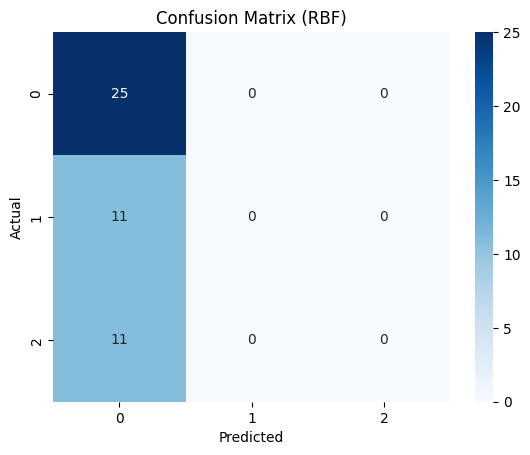

In [205]:

svm_classifier_rbf = SVC(kernel='rbf')
svm_classifier_rbf.fit(X_train, y_train)


y_pred_rbf = svm_classifier_rbf.predict(X_test)


accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf, average='weighted')
recall_rbf = recall_score(y_test, y_pred_rbf, average='weighted')
f1_rbf = f1_score(y_test, y_pred_rbf, average='weighted')


print(f"Accuracy (RBF): {accuracy_rbf}")
print(f"Precision (RBF): {precision_rbf}")
print(f"Recall (RBF): {recall_rbf}")
print(f"F1-score (RBF): {f1_rbf}")


cm_rbf = confusion_matrix(y_test, y_pred_rbf)
print("Confusion Matrix (RBF):")
print(cm_rbf)


sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (RBF)")
plt.show()

### SVM WITH "RBF" KERNELL PERFORMED A BIT WELL.

## **RANDOM FOREST**

Random Forest Model Evaluation:
Accuracy: 0.6170212765957447
Precision: 0.6480029861888764
Recall: 0.6170212765957447
F1-score: 0.5606412777877109

Confusion Matrix (Random Forest):
[[24  1  0]
 [ 9  2  0]
 [ 5  3  3]]


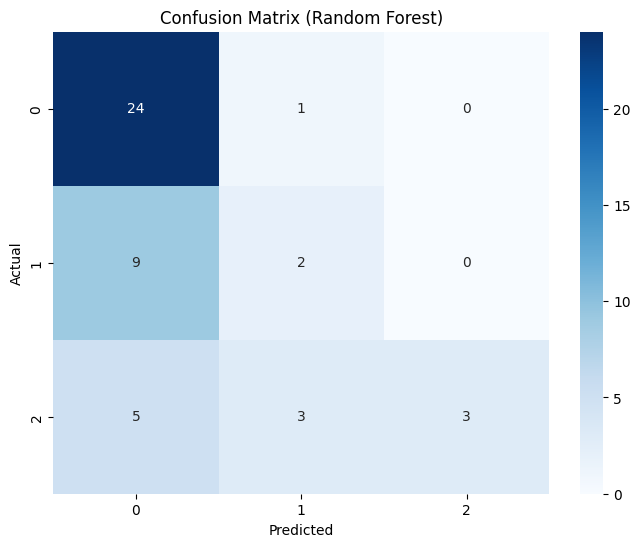

In [206]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Scale the data before training
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-score: {f1_rf}")

# Confusion Matrix for Random Forest
print("\nConfusion Matrix (Random Forest):")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

# Now, let's see if we can do any better by parameter tuning

## **GRID SEARCH**

In [207]:
from sklearn.model_selection import GridSearchCV

param_grid_svm = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

In [208]:
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

print("\nBest parameters for Random Forest(Grid Search):", grid_search_rf.best_params_)
print("Best cross-validation accuracy for Random Forest:", grid_search_rf.best_score_)


Best parameters for Random Forest(Grid Search): {'max_depth': None, 'n_estimators': 50}
Best cross-validation accuracy for Random Forest: 0.7486486486486488


In [209]:
# predicting on test set using the best model
best_rf = grid_search_rf.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

# Evaluating performance on test set
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Test Accuracy: 0.5957446808510638

Classification Report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.77        25
           1       0.20      0.09      0.12        11
           2       1.00      0.18      0.31        11

    accuracy                           0.60        47
   macro avg       0.61      0.42      0.40        47
weighted avg       0.61      0.60      0.51        47


Confusion Matrix:
 [[25  0  0]
 [10  1  0]
 [ 5  4  2]]


## **Randomized Search**

In [210]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist_rf = {'n_estimators': sp_randint(50, 201),
                 'max_depth': [None, 10, 20, 30, 40, 50],
                 'min_samples_split': sp_randint(2, 11),
                 'min_samples_leaf': sp_randint(1, 11),
                 'bootstrap': [True, False]}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                      param_distributions=param_dist_rf,
                                      n_iter=100, # Number of parameter settings that are sampled
                                      cv=5,
                                      scoring='accuracy',
                                      random_state=42,
                                      n_jobs=-1) # Use all available cores

random_search_rf.fit(X_train_scaled, y_train)

print("Best parameters for Random Forest (Randomized Search):", random_search_rf.best_params_)
print("Best cross-validation accuracy for Random Forest (Randomized Search):", random_search_rf.best_score_)

Best parameters for Random Forest (Randomized Search): {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 153}
Best cross-validation accuracy for Random Forest (Randomized Search): 0.759317211948791



Test set performance of the best model (Random Forest (Randomized Search)):
Accuracy: 0.6170
Precision: 0.6530
Recall: 0.6170


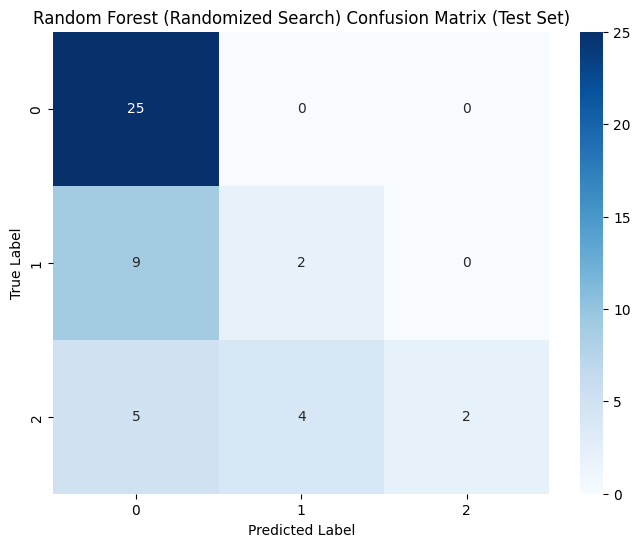

In [211]:
best_model = random_search_rf.best_estimator_
best_model_name = "Random Forest (Randomized Search)"
best_cv_accuracy = random_search_rf.best_score_

y_pred_best = best_model.predict(X_test_scaled)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted') # Use weighted average for multi-class
recall_best = recall_score(y_test, y_pred_best, average='weighted')   # Use weighted average for multi-class
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

print(f"\nTest set performance of the best model ({best_model_name}):")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'{best_model_name} Confusion Matrix (Test Set)')
plt.show()



Justification for why Random Forest (Randomized Search) is the best model:
Based on cross-validation accuracy, the Random Forest (Randomized Search) achieved the highest score of 0.7593 among the models and tuning techniques evaluated so far.
Evaluating this model on the unseen test set, it achieved:
- Accuracy: 0.6170
- Precision: 0.6530
- Recall: 0.6170

## **NEURAL NETWORK**

In [212]:
X = data.drop('num', axis=1)
y = data['num']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = Sequential()

# Input layer and first hidden layer
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))

# Output layer for multi-class classification
model.add(Dense(len(y.unique()), activation='softmax'))

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,155 (4.51 KB)

 Trainable params: 1,155 (4.51 KB)

 Non-trainable params: 0 (0.00 B)

In [213]:
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = ['acc']) # Use sparse_categorical_crossentropy for integer labels
model.fit(X_train, y_train, batch_size = 32, verbose = 2, epochs = 60)

Epoch 1/60
6/6 - 2s - 263ms/step - acc: 0.2193 - loss: 1.4358
Epoch 2/60
6/6 - 0s - 10ms/step - acc: 0.2246 - loss: 1.2772
Epoch 3/60
6/6 - 0s - 10ms/step - acc: 0.2727 - loss: 1.1396
Epoch 4/60
6/6 - 0s - 9ms/step - acc: 0.4225 - loss: 1.0292
Epoch 5/60
6/6 - 0s - 9ms/step - acc: 0.5936 - loss: 0.9256
Epoch 6/60
6/6 - 0s - 10ms/step - acc: 0.6791 - loss: 0.8456
Epoch 7/60
6/6 - 0s - 11ms/step - acc: 0.7219 - loss: 0.7776
Epoch 8/60
6/6 - 0s - 10ms/step - acc: 0.7647 - loss: 0.7236
Epoch 9/60
6/6 - 0s - 9ms/step - acc: 0.7754 - loss: 0.6816
Epoch 10/60
6/6 - 0s - 9ms/step - acc: 0.7861 - loss: 0.6479
Epoch 11/60
6/6 - 0s - 10ms/step - acc: 0.8075 - loss: 0.6186
Epoch 12/60
6/6 - 0s - 11ms/step - acc: 0.8182 - loss: 0.5960
Epoch 13/60
6/6 - 0s - 60ms/step - acc: 0.8075 - loss: 0.5760
Epoch 14/60
6/6 - 0s - 48ms/step - acc: 0.8128 - loss: 0.5597
Epoch 15/60
6/6 - 0s - 29ms/step - acc: 0.8075 - loss: 0.5451
Epoch 16/60
6/6 - 0s - 41ms/step - acc: 0.8128 - loss: 0.5329
Epoch 17/60
6/6 - 0s

In [214]:
predict = model.predict(X_test)
# Since the output layer uses softmax, the prediction will be probabilities for each class.
# We can get the predicted class by taking the argmax
predicted_classes = np.argmax(predict, axis=1)
print(predicted_classes)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[0 1 0 0 0 0 0 2 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 2 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 2 0 1 0 0 2 0]


In [215]:
Y_pred_rand = np.argmax(model.predict(X_test), axis=1)
print('Precision : ', np.round(metrics.precision_score(y_test, Y_pred_rand, average='weighted')*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(y_test, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(y_test, Y_pred_rand, average='weighted')*100,2))
print('F1 score : ', np.round(metrics.f1_score(y_test, Y_pred_rand, average='weighted')*100,2))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Precision :  51.44
Accuracy :  51.06
Recall :  51.06
F1 score :  47.76


# **PARAMETER TUNING**

In [222]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(y.unique()), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,139 (12.26 KB)

 Trainable params: 3,139 (12.26 KB)

 Non-trainable params: 0 (0.00 B)

In [223]:
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = ['acc']) # Use sparse_categorical_crossentropy for integer labels
model.fit(X_train, y_train, batch_size = 32, verbose = 2, epochs = 60)

Epoch 1/60
6/6 - 1s - 201ms/step - acc: 0.1765 - loss: 1.3020
Epoch 2/60
6/6 - 0s - 9ms/step - acc: 0.3743 - loss: 1.0966
Epoch 3/60
6/6 - 0s - 9ms/step - acc: 0.6150 - loss: 0.9637
Epoch 4/60
6/6 - 0s - 10ms/step - acc: 0.7112 - loss: 0.8560
Epoch 5/60
6/6 - 0s - 10ms/step - acc: 0.7273 - loss: 0.7723
Epoch 6/60
6/6 - 0s - 23ms/step - acc: 0.7273 - loss: 0.7137
Epoch 7/60
6/6 - 0s - 27ms/step - acc: 0.7326 - loss: 0.6627
Epoch 8/60
6/6 - 0s - 24ms/step - acc: 0.7326 - loss: 0.6200
Epoch 9/60
6/6 - 0s - 23ms/step - acc: 0.7647 - loss: 0.5889
Epoch 10/60
6/6 - 0s - 24ms/step - acc: 0.7807 - loss: 0.5603
Epoch 11/60
6/6 - 0s - 15ms/step - acc: 0.8075 - loss: 0.5388
Epoch 12/60
6/6 - 0s - 16ms/step - acc: 0.8235 - loss: 0.5173
Epoch 13/60
6/6 - 0s - 21ms/step - acc: 0.8289 - loss: 0.5003
Epoch 14/60
6/6 - 0s - 14ms/step - acc: 0.8342 - loss: 0.4852
Epoch 15/60
6/6 - 0s - 22ms/step - acc: 0.8396 - loss: 0.4702
Epoch 16/60
6/6 - 0s - 24ms/step - acc: 0.8449 - loss: 0.4568
Epoch 17/60
6/6 - 

In [224]:
predict = model.predict(X_test)
predicted_classes = np.argmax(predict, axis=1)
print(predicted_classes)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
[0 0 0 0 0 0 0 0 0 0 1 2 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 2 0 1 0 0 2 0]


In [225]:
from sklearn import metrics
Y_pred_rand = np.argmax(model.predict(X_test), axis=1)
print('Precision : ', np.round(metrics.precision_score(y_test, Y_pred_rand, average='weighted')*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(y_test, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(y_test, Y_pred_rand, average='weighted')*100,2))
print('F1 score : ', np.round(metrics.f1_score(y_test, Y_pred_rand, average='weighted')*100,2))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Precision :  53.92
Accuracy :  55.32
Recall :  55.32
F1 score :  49.64


After addimg RELU again to a layer, the results here are better than the first one.

In [228]:
results = {
    'Model': ['Decision Tree (Tuned)', 'SVM (Linear)', 'SVM (RBF)', 'Random Forest', 'Random Forest (Grid Search)', 'Random Forest (Randomized Search)', 'Neural Network (Initial)', 'Neural Network (Tuned)'],
    'Accuracy': [0.6170, 0.4894, 0.5319, 0.6170, 0.5957, 0.6170, 0.5106, 0.5532],
    'Precision': [0.6480, 0.4923, 0.2829, 0.6480, 0.6100, 0.6530, 0.5144, 0.5392],
    'Recall': [0.6170, 0.4894, 0.5319, 0.6170, 0.5957, 0.6170, 0.5106, 0.5532],
    'F1-score': [0.5606, 0.4498, 0.3694, 0.5606, 0.5100, 0.5606, 0.4776, 0.4964]
}

results_df = pd.DataFrame(results)

display(results_df.sort_values(by='Accuracy', ascending=False).style.background_gradient(subset=['Accuracy', 'Precision', 'Recall', 'F1-score'], cmap='Blues'))

,Model,Accuracy,Precision,Recall,F1-score
0,Decision Tree (Tuned),0.617000,0.648000,0.617000,0.560600
3,Random Forest,0.617000,0.648000,0.617000,0.560600
5,Random Forest (Randomized Search),0.617000,0.653000,0.617000,0.560600
4,Random Forest (Grid Search),0.595700,0.610000,0.595700,0.510000
7,Neural Network (Tuned),0.553200,0.539200,0.553200,0.496400
2,SVM (RBF),0.531900,0.282900,0.531900,0.369400
6,Neural Network (Initial),0.510600,0.514400,0.510600,0.477600
1,SVM (Linear),0.489400,0.492300,0.489400,0.449800


**Above is the comapred table of the models, before and after tuning. We see that, Decsion Tree worked the best among of all and the SVM "Liner" kernel was at the lowest with the accuracy, precision, recall and F-1 score.**